# Technical Test
___

## 1. Introduction

Nama    : Yonathan Anggraiwan

Posisi  : Integrated Service Quality

Saya adalah seorang data analyst yang bekerja di suatu perusahaan, yaitu PT. AAAA. Seorang Manager meminta kepada saya untuk membuatkan model prediksi harga mobil bekas.

Tujuan yang hendak dicapai adalah saya dapat mengetahui fitur-fitur atau variabel-variabel apa yang berpengaruh terhadap prediksi harga mobil bekas, dan mengolahnya untuk membuat model yang bagus dan memiliki akurasi yang tinggi, serta nilai error yang rendah dalam memprediksi skor tersebut.

User/client saya adalah seorang Manager dari PT. AAAA.

Objektif:
Objektif dari program ini adalah saya perlu untuk memahami konsep model yang digunakan dengan dengan benar. Saya juga perlu untuk dapat menyiapkan datanya dengan baik, dan mengimplementasikan algoritmanya untuk menghasilkan hasil prediksi yang baik dengan waktu yang singkat.

Algoritma yang digunakan dalam mengolah data ini adalah dengan menggunakan beberapa metode regresi, yaitu KNN, Decision Tree, Random Forest, SVM dan XGBoost Regressor.

Milestone 2 ini dibuat dengan tujuan sebagai berikut:

1. Mampu memahami konsep Machine Learning secara keseluruhan.

2. Mampu mempersiapkan data untuk digunakan dalam model Supervised Learning (Regression).

3. Mampu mengimplementasikan Supervised Learning (Regression) dengan data yang dipilih.

4. Mampu melakukan Hyperparameter Tuning dan Model Improvement, dan

5. Mampu melakukan Model Deployment.

Berikut dibawah ini saya tampilkan hasil pembuatan streamlit dari pemodelan data ini dan link dashboard interaktif.

Streamlit Deployment [link]()

Tableau Dashboard [link](https://public.tableau.com/views/Dashboard_17587337302300/Dashboard1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)
___

## 2. Import Libraries

In [1]:
import pandas as pd                                     # Manipulasi dan analisis data tabular
import numpy as np                                      # Operasi numerik dan manipulasi array
import seaborn as sns                                   # Visualisasi data berbasis statistik
import matplotlib.pyplot as plt                         # Membuat grafik dan plot untuk analisis data
import json                                             # Menyimpan dan membaca data dalam format JSON
import pickle                                           # Menyimpan dan memuat objek Python dalam format biner
import os                                               # Manipulasi file dan direktori sistem operasi
import scipy.stats as stats                             # Fungsi statistik dan distribusi probabilitas
import time                                             # Pengukuran dan manajemen waktu dalam program
import plotly.express as px                             # Visualisasi data interaktif
from scipy.stats import chi2_contingency                # Menghitung korelasi Chi-Square antara dua variabel kategorikal 
from dateutil import parser                             # Parsing dan manipulasi tanggal dan waktu

from scipy.stats import pearsonr                        # Menghitung korelasi Pearson antara dua variabel numerik
from sklearn.model_selection import train_test_split    # Membagi dataset menjadi set pelatihan dan set pengujian
from sklearn.preprocessing import MinMaxScaler          # Normalisasi fitur dengan skala Min-Max untuk menghindari perbedaan skala
from sklearn.preprocessing import OneHotEncoder         # Encoding variabel kategorikal ke format numerik dengan skala nominal
from sklearn.preprocessing import OrdinalEncoder        # Encoding variabel kategorikal dengan urutan tertentu
from sklearn.pipeline import Pipeline                   # Membuat alur pemrosesan model secara sistematis
from sklearn.compose import ColumnTransformer           # Transformasi kolom dataset dengan teknik berbeda
from sklearn.preprocessing import RobustScaler, StandardScaler # Teknik normalisasi dan standardisasi fitur
from sklearn.metrics import mean_absolute_error, r2_score # Evaluasi model dengan MAE, MSE, dan R²
from sklearn.model_selection import RandomizedSearchCV  # Pencarian hyperparameter terbaik secara acak
from sklearn.neighbors import KNeighborsRegressor       # Model regresi berbasis *nearest neighbors*
from sklearn.tree import DecisionTreeRegressor          # Model regresi berbasis pohon keputusan
from sklearn.ensemble import RandomForestRegressor      # Model regresi berbasis hutan acak untuk meningkatkan performa
from sklearn.svm import SVR                             # Model regresi berbasis *Support Vector Regression*
from xgboost import XGBRegressor                        # Model regresi berbasis XGBoost dengan boosting algoritma
from sklearn.model_selection import cross_val_score
from great_expectations.data_context import FileDataContext

___
## 3. Data Loading

Untuk mengolah dataset, datanya pertama-tama perlu untuk di loading terlebih dahulu menggunakan syntax pandas, yaitu pd.read_csv().

In [2]:
# Panggil dataset
df = pd.read_csv("car_sales.csv")
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
year,2013,2014,2013,2009,2014,2012,2001,2013,2014,2014
make,Hyundai,Jeep,Ford,Chevrolet,Ford,Honda,Chevrolet,Chevrolet,Infiniti,Nissan
model,Elantra,Patriot,Edge,Impala,Fusion,Crosstour,Malibu,Impala,Q50,Altima
trim,GLS,Limited,Limited,LS,SE,EX,Base,LTZ,Premium,2.5 S
body,sedan,SUV,SUV,Sedan,Sedan,Hatchback,Sedan,Sedan,Sedan,sedan
transmission,automatic,automatic,automatic,automatic,automatic,automatic,automatic,automatic,automatic,automatic
vin,5npdh4ae0dh326532,1c4njrcb6ed842622,2fmdk4kc0dbc22340,2g1wb57k291189849,3fa6p0hd2er160035,5j6tf3h31cl003210,1g1nd52j316205994,2g1wc5e37d1212625,jn1bv7apxem672889,1n4al3ap9en370128
branch,JAKARTA,JAKARTA,SURABAYA,MEDAN,MEDAN,BALIKPAPAN,SURABAYA,MEDAN,BALIKPAPAN,SURABAYA
condition,48.0,47.0,29.0,2.0,46.0,44.0,19.0,31.0,44.0,4.0
odometer,33610.0,27249.0,56447.0,14916.0,37674.0,29305.0,143885.0,47206.0,18799.0,6804.0


Insight:
Datanya sudah berhasil di load atau dipanggil. Berikut ini adalah penjelasan singkat tentang kolom-kolom datanya:

1. year = Tahun produksi kendaraan

2. make = Merk mobil

3. model = Model mobil

4. trim = Desain/seri detail modil

5. body = Tipe kendaraan

6. transmission = Tipe transmisi kendaraan

7. vin = Nomor VIN kendaraan

8. branch = Cabang _dealer_

9. condition = Kondisi unit

10. odometer = Total KM dikendarai

11. color Warna = eksterior

12. interior Warna = interior

13. seller = Kustomer pembeli

14. marketprice = Harga pasar saat ini (2019)

15. sellingprice = Harga jual terlaksana

16. saledate = Tanggal penjualan

Selanjutnya saya ingin mengecek bagaimana dimensi dari data ini menggunakan syntax .shape .
___

In [26]:
# Mengecek dimensi datanya
df.shape

(12000, 16)

Insight:

Data ini berdimensi 12000 baris dengan 16 kolom.

Selanjutnya saya ingin melihat deskripsi data ini menggunakan syntax .info() dan .describe().
___

In [27]:
# Menampilkan informasi data dan tipe kolom, serta isi data dan missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          12000 non-null  int64  
 1   make          11777 non-null  object 
 2   model         11775 non-null  object 
 3   trim          11769 non-null  object 
 4   body          11713 non-null  object 
 5   transmission  10552 non-null  object 
 6   vin           12000 non-null  object 
 7   branch        12000 non-null  object 
 8   condition     11776 non-null  float64
 9   odometer      11997 non-null  float64
 10  color         11985 non-null  object 
 11  interior      11985 non-null  object 
 12  seller        12000 non-null  object 
 13  marketprice   11999 non-null  float64
 14  sellingprice  11999 non-null  float64
 15  saledate      12000 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 1.5+ MB


Insight:

Dari syntax .info(), saya dapat melihat bahwa data ini terdiri dari 12.000 baris, tetapi terdapat beberapa data yang kosong. 

Dari analisa saya, semua data sudah memiliki tipe kolom dengan value yang sesuai, kecuali kolom 'saledate' yang seharusnya adalah bertipe datetime. Akan tetapi karena data ini tidak memiliki informasi yang penting dalam proses prediksi harga, maka kolom ini akan dihapus.

Selanjutnya saya ingin melihat deskripsi datanya menggunakan syntax .describe(), dimana hasil yang keluar adalah nilai mean (rata-rata value), nilai std (standar deviasi), hingga nilai minimum dan maksimum dari kolom-kolom numerik. Informasi yang digali dapat berguna untuk melihat apakah data dari kolom-kolom numerik berdistribusi normal atau tidak, apakah memiliki outlier atau tidak.
___

In [3]:
df['saledate'] = df['saledate'].replace(['-', '', None], pd.NA)

def to_month_year(x):
    try:
        return parser.parse(x).strftime('%B %Y')
    except:
        return ''

df['saledate_month_year'] = df['saledate'].apply(to_month_year)

In [4]:
df.drop(columns=['saledate'], inplace=True)
df.to_excel("car_sales_cleaned.xlsx", index=False)
df.drop(columns=['saledate_month_year'], inplace=True)

In [5]:
# Mengecek deskripsi data numeriknya
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,12000.0,2.010054e+03,3.950381e+00,1987.0,2008.0,2012.0,2013.0,2.015000e+03
condition,11776.0,3.063477e+01,1.349874e+01,1.0,23.0,35.0,42.0,4.900000e+01
odometer,11997.0,6.826108e+04,5.355644e+04,1.0,28415.0,52692.0,98854.0,9.999990e+05
marketprice,11999.0,2.969867e+08,2.108742e+08,1075000.0,152650000.0,263375000.0,395600000.0,3.784000e+09
sellingprice,11999.0,2.938245e+08,2.112563e+08,4300000.0,150500000.0,262300000.0,393450000.0,3.547500e+09


Insight:

Terdapat 2 kolom data numerik yang memiliki standar deviasi dalam jumlah yang tinggi, yang artinya adalah datanya sangat bervariasi atau tersebar, yaitu pada kolom data 'marketprice' dan 'sellingprice'. Sehingga dapat disimpulkan bahwa data kolom-kolom numerik ini mayoritas berdistribusi tidak normal dan bisa terdapat outlier. Untuk outlier ini tidak akan dihandle karena data ini adalah data yang sesungguhnya dari harga market dengan harga penjualan mobil. Justru jika dihandle maka akan merusak data tersebut.

Selanjutnya saya ingin mengecek apakah terdapat data duplikat atau tidak mengguakan syntax .duplicated().sum()
___

In [21]:
# Syntax untuk mengecek jumlah data duplikat
df.duplicated().sum()

0

Insight:

Tidak ada data duplikat dalam datanya. Selanjutnya saya ingin mengecek apakah terdapat data yang hilang atau tidak (missing value) menggunakan syntax .isna().sum().sum().
___

In [22]:
df.isna().sum().sum()

2673

Insight:

Terdapat 2673 data yang hilang pada data ini.

Saya akan melakukan pengisian data yang hilang atau kosong pada data ini.

Untuk data kolom numerikal yang hilang, akan saya isi dengan angka tengah atau median dari datanya, sehingga tidak membuat datanya semakin berdistribusi tidak normal.

Untuk kolom kategorikal, akan saya isi dengan data modus data atau data terbanyak, dan ada juga yang saya isi dengan 'unknown'
___

In [6]:
pd.options.mode.chained_assignment = None # menghapus warning

# 1. Imputasi kolom numerik dengan median
numerical_cols = ['odometer', 'condition', 'marketprice', 'sellingprice']
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

# 2. Imputasi dengan modus
mode_cols = ['make', 'model', 'color', 'interior']
for col in mode_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)

# 3. Imputasi dengan label 'Unknown'
unknown_cols = ['trim', 'body', 'transmission']
for col in unknown_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna('Unknown', inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          12000 non-null  int64  
 1   make          12000 non-null  object 
 2   model         12000 non-null  object 
 3   trim          12000 non-null  object 
 4   body          12000 non-null  object 
 5   transmission  12000 non-null  object 
 6   vin           12000 non-null  object 
 7   branch        12000 non-null  object 
 8   condition     12000 non-null  float64
 9   odometer      12000 non-null  float64
 10  color         12000 non-null  object 
 11  interior      12000 non-null  object 
 12  seller        12000 non-null  object 
 13  marketprice   12000 non-null  float64
 14  sellingprice  12000 non-null  float64
dtypes: float64(4), int64(1), object(10)
memory usage: 1.4+ MB


Selanjutnya saya akan melakukan Great Expectation dari data ini.

___
## 4. Great Expectation

Dalam GE (Great Expecations), langkah pertama adalah membuat konteks data yang diolah, lalu menamakan data yang digunakan, serta mengatur lokasi dari data yang diolah, supaya datanya dapat siap untuk divalidasi menggunakan validator Great Expectations.

In [25]:
# Create a data context
context = FileDataContext.create(project_root_dir='./')

In [26]:
datasource_name = 'csv-data-ti-1,'
datasource = context.sources.add_pandas(datasource_name)

asset_name = 'ti-1-asset'

path_to_data = r'D:\1. Data Science\2. Lamaran Kerja\Technical Test\September\Indotruck Utama\car_sales.csv'
asset = datasource.add_csv_asset(asset_name, filepath_or_buffer=path_to_data)

batch_request = asset.build_batch_request()

In [27]:
expectation_suite_name = 'expectation-data-ti'
context.add_or_update_expectation_suite(expectation_suite_name)

validator = context.get_validator(
    batch_request = batch_request,
    expectation_suite_name = expectation_suite_name)

validator.head()

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

,year,make,model,trim,body,transmission,vin,branch,condition,odometer,color,interior,seller,marketprice,sellingprice,saledate
0,2013,Hyundai,Elantra,GLS,sedan,automatic,5npdh4ae0dh326532,JAKARTA,48.0,33610.0,black,beige,hyundai motor finance,227900000.0,236500000.0,Tue Jun 16 2018 02:30:00 GMT-0700 (PDT)
1,2014,Jeep,Patriot,Limited,SUV,automatic,1c4njrcb6ed842622,JAKARTA,47.0,27249.0,white,tan,budget rent a car/kansas city funding llc,389150000.0,389150000.0,Wed Mar 04 2018 02:30:00 GMT-0800 (PST)
2,2013,Ford,Edge,Limited,SUV,automatic,2fmdk4kc0dbc22340,SURABAYA,29.0,56447.0,gray,black,the hertz corporation,396675000.0,397750000.0,Wed Jan 07 2019 12:30:00 GMT-0800 (PST)
3,2009,Chevrolet,Impala,LS,Sedan,automatic,2g1wb57k291189849,MEDAN,2.0,14916.0,gray,gray,westlake financial services,180600000.0,150500000.0,Tue Jan 13 2018 10:00:00 GMT-0800 (PST)
4,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0hd2er160035,MEDAN,46.0,37674.0,brown,black,avis corporation,324650000.0,320350000.0,Wed Feb 18 2019 02:00:00 GMT-0800 (PST)


Setelah data sudah berhasil disiapkan dan validatornya sudah dihubungkan dengan data, maka kita masuk ke sesi validasinya, dimana saya melakukan 6 ekspektasi dalam data ini.

___
### GE 1: To Be Unique

Espektasi 'expect_compound_columns_to_be_unique' digunakan untuk memastikan bahwa gabungan nilai-nilai dari seluruh kolom dalam data tidak ada yang sama persis antar baris. 

In [28]:
# Expectation 1:

validator.expect_compound_columns_to_be_unique(
    column_list = [
    "year", 
    "make", 
    "model", 
    "trim", 
    "body", 
    "transmission",
    "vin", 
    "branch", 
    "condition", 
    "odometer",
    "color", 
    "interior", 
    "seller", 
    "marketprice",
    "sellingprice", 
    "saledate"])

Calculating Metrics:   0%|          | 0/7 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 12000,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

Dari pengecekan, semua gabungan nilai-nilai dari seluruh kolom dalam data tidak ada yang sama persis antar baris. 

- Total pengecekan baris: 12.000 baris
- Nilai duplikat yang tidak terduga: 0
- Nilai hilang: 0
- Persentase tak terduga: 0,0%

___
### GE 2: To Be Between

Ekspektasi 'expect_column_values_to_be_between' digunakan untuk memastikan nilai value dalam suatu kolom berada dalam suatu rentan yang ada.

Dalam data ini, saya ingin memvalidasi apakah data 'sellingprice' terdapat dalam rentan 4 juta hingga 4 milyar.

In [29]:
# Expectation 2:

validator.expect_column_values_to_be_between(
    column="sellingprice",
    min_value=4000000,
    max_value=4000000000
)

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 12000,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 1,
    "missing_percent": 0.008333333333333333,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

Dalam pengecekan, dapat disimpulkan kebenaran dari harga jual mobil berada dalam rentan 4 juta hingga 4 milyar.

- Total pengecekan baris: 12.000 baris
- Persentase tak terduga: 0,0%
- Nilai hilang: 0
- Total persentase tak terduga: 0,0%

___
### GE 3: Most Common Value To Be In Set

Ekspektasi 'expect_column_most_common_value_to_be_in_set' digunakan untuk memvalidasi nilai atau value data yang paling sering muncul dalam suatu kolom.

Pada ekspektasi ini, saya memvalidasi manakah merk mobil yang paling banyak dalam data ini, apakah 'Hyundai' atau 'Ford'.

In [30]:
# Expectation 3:

validator.expect_column_most_common_value_to_be_in_set(
    column='make',
    value_set=['Hyundai', 'Ford'],
    ties_okay=True
)


Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "observed_value": [
      "Ford"
    ]
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

Dalam pengecekan, data merk mobil 'Ford' lebih banyak dibanding mobil 'Hyundai'.

- Nilai obseravasi: Ford

___
### GE 4: Column Values To Be In Set

Ekspektasi 'expect_column_values_to_be_in_set' digunakan untuk melakukan validasi nilai dalam suatu kolom apakah benar berisi nilai-nilai yang divalidasi atau tidak.

Dalam ekspektasi ini, saya memvalidasi apakah hanya terdapat transmisi mobil automatic, manual, dan unknown dalam data.

In [31]:
# Expectation 4:

validator.expect_column_values_to_be_in_set(
    column="transmission",
    value_set=['automatic', 'manual', 'unknown']
)

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 12000,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 1448,
    "missing_percent": 12.066666666666666,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

Dalam pengecekan, betul adanya bahwa hanya terdapat transmisi mobil automatic, manual, dan unknown dalam data.

- Total pengecekan baris: 12.000 baris
- Persentase tak terduga: 0,0%
- Nilai hilang: 1448
- Total persentase tak terduga: 0,0%

___
### GE 5: Column Values To Not Be Null

Ekspektasi 'expect_column_values_to_not_be_null' diperlukan untuk mengecek atau memvalidasi apakah terdapat data hilang dalam suatu kolom atau tidak.

Disini saya ingin mengecek apakah semua tempat dealer 'branch' mobil sudah terisi semua atau belum.

In [32]:
# Expectation 5:

validator.expect_column_values_to_not_be_null(column="branch")

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 12000,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": []
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

Dalam pengecekan, betul bahwa semua data dealer mobil sudah terisi.

- Total pengecekan baris: 12.000 baris
- Persentase tak terduga: 0,0%

___
### GE 6: Table Column Count To Equal

Ekspektasi 'expect_table_column_count_to_equal' digunakan untuk mengecek atau memvalidasi apakah benar jumlah data yang sedang digunakan, benar berjumlah sekian kolom atau sekian data.

Pada data ini, jumlah data mobil yang seharusnya dimiliki adalah 16 tipe data atau 16 kolom data.

In [33]:
# Expectation 6:

validator.expect_table_column_count_to_equal(value=16)

Calculating Metrics:   0%|          | 0/3 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "observed_value": 16
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

Dalam pengecekan, betul bahwa data yang digunakan dalam observasi berjumlah 16 kolom data atau 16 tipe data mobil.

- Kolom yang diobservasi: 16 kolom

Selanjutnya saya akan masuk ke bagian eksplorasi data.

___
## 5. Exploratory Data Analysis (EDA)

Dalam EDA, terdapat beberapa hal yang perlu untuk saya selesaikan, yaitu:

1. Apakah menjual mobil-mobil tua masih menguntungkan secara bisnis?

2. Merk mobil beserta tipe apa saja yang paling sering terjual?

3. Apakah ada hubungan antara tahun produksi dengan harga pasaran mobil saat ini?

4. Bagaimana caranya memperkirakan harga pasar dari tipe mobil yang belum masuk di dalam dataset?

___

### 5.1 EDA 1. Apakah menjual mobil-mobil tua masih menguntungkan secara bisnis?

Untuk memahami apakah mobil tua masih menguntungkan secara bisnis, saya menghitung margin penjualan (selisih antara harga jual dan harga pasar) dan mengelompokkan data berdasarkan tahun produksi. Hasilnya akan menunjukkan apakah mobil dari era tertentu cenderung menghasilkan keuntungan atau kerugian.

Saya mengelompokkan kategori tahun mobil kepada 3 kelompok, yaitu mobil 'tua', mobil 'menengah', dan mobil 'baru'.

In [10]:
df['margin'] = df['sellingprice'] - df['marketprice']
df['year_group'] = pd.cut(df['year'], bins=[1986, 1999, 2009, 2015],
                          labels=['Tua', 'Menengah', 'Baru'])
df.groupby('year_group')['margin'].mean()

year_group
Tua        -4.002660e+04
Menengah   -1.779453e+06
Baru       -3.920772e+06
Name: margin, dtype: float64

Semua kelompok tahun menunjukkan margin negatif, artinya mobil dijual di bawah harga pasar rata-rata.

Ini bisa mencerminkan strategi diskon dan sebuah depresiasi pasar.

- Mobil tua (1987–1999) memiliki margin paling kecil secara negatif, yaitu rata-rata rugi hanya sekitar 40 ribu, hampir impas. Ini menunjukkan bahwa mobil tua masih bisa dijual dengan harga mendekati nilai pasar, terutama jika menyasar segmen mobil klasik atau second-hand murah.

- Mobil menengah (2000–2009) dan baru (2010–2015) justru menunjukkan kerugian lebih besar. Mobil baru rugi rata-rata 3.9 juta, kemungkinan karena harga pasar terlalu tinggi dibanding harga jual aktual, penjual memberi diskon besar untuk menarik pembeli dan depresiasi cepat pada mobil baru.

Mobil tua menunjukkan potensi margin yang lebih stabil dibanding mobil baru, meskipun volumenya lebih rendah. Ini membuka peluang untuk strategi penjualan mobil bekas tua sebagai segmen pasar yang minim depresiasi walaupun dari data masih merugikan perusahaan.

___
### 5.2 EDA 2. Merk mobil beserta tipe apa saja yang paling sering terjual?

Saya akan membuat grafik pie dalam merk dan tipe mobil yang paling sering terjual.

In [35]:
make_counts = df['make'].value_counts().head(10).reset_index()
make_counts.columns = ['make', 'count']

# Plot pie chart
fig = px.pie(make_counts, names='make', values='count',
             title='Top 10 Merk Mobil Terlaris',
             color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(title_x=0.5)
fig.update_traces(textinfo='percent+label', pull=[0.05]*10)
fig.show()

Untuk merk mobil yang paling terlaris dari dalam data ini adalah Ford.

In [36]:
model_counts = df['model'].value_counts().head(10).reset_index()
model_counts.columns = ['model', 'count']

# Plot pie chart
fig = px.pie(model_counts, names='model', values='count',
             title='Top 10 Tipe Mobil Terlaris',
             color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(title_x=0.5)
fig.update_traces(textinfo='percent+label', pull=[0.05]*10)
fig.show()

Untuk model mobil yang paling terlaris dari dalam data ini adalah Altima.

___
### 5.3 EDA 3. Apakah ada hubungan antara tahun produksi dengan harga pasaran mobil saat ini?

Tahun produksi memiliki pengaruh signifikan terhadap harga pasar mobil. Mobil yang lebih baru cenderung memiliki nilai jual lebih tinggi, namun mobil tua tertentu bisa tetap bernilai tinggi jika memiliki karakteristik khusus. Ini penting untuk strategi valuasi dan segmentasi pasar.

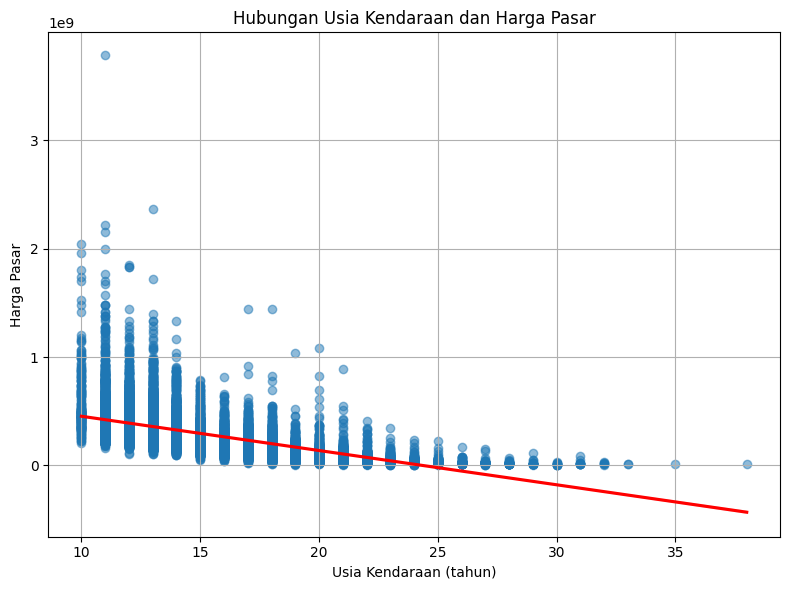

Korelasi Spearman antara usia kendaraan dan harga pasar: -0.69


In [9]:
# Menambah kolom usia kendaraan
df['vehicle_age'] = 2025 - df['year']

# Scatter plot + regresi linier
plt.figure(figsize=(8, 6))
sns.regplot(x='vehicle_age', y='marketprice', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Hubungan Usia Kendaraan dan Harga Pasar')
plt.xlabel('Usia Kendaraan (tahun)')
plt.ylabel('Harga Pasar')
plt.grid(True)
plt.tight_layout()
plt.show()

# Hitung korelasi Spearman
spearman_corr = df[['vehicle_age', 'marketprice']].corr(method='spearman').iloc[0, 1]
print(f"Korelasi Spearman antara usia kendaraan dan harga pasar: {spearman_corr:.2f}")

Terdapat hubungan yang kuat antara tahun produksi dan harga pasar mobil. Semakin tua usia kendaraan, semakin rendah nilai pasarnya. Hal ini terlihat dari tren menurun pada scatter plot antara usia kendaraan dan harga pasar, serta korelasi Spearman sebesar –0.69 yang menunjukkan hubungan negatif yang konsisten.

Korelasi tersebut menunjukkan bahwa penurunan harga bersifat linear. Mobil yang lebih tua cenderung memiliki harga pasar lebih rendah, terlepas dari distribusi data atau keberadaan outlier. Temuan ini sejalan dengan prinsip depresiasi kendaraan, dan menunjukkan bahwa usia kendaraan merupakan salah satu fitur penting dalam proses valuasi.

Namun, terdapat beberapa mobil tua yang tetap memiliki harga pasar tinggi. Hal ini kemungkinan disebabkan oleh status klasik, kelangkaan, atau kondisi kendaraan yang sangat baik, sehingga tetap menarik bagi para pembeli mobil tua atau kolektor mobil antik.


___
### 5.4 EDA 4. Bagaimana caranya memperkirakan harga pasar dari tipe mobil yang belum masuk di dalam dataset?

Cara memperkirakan harga pasar dari tipe mobil yang belum masuk dalam dataset tentu saja dengan membuat model prediksi harga. Model ini dapat dibangun dengan menggunakan data-data yang sudah ada sebagai acuan dasar model. Berikutnya saya akan membuat model ini dengan membandingkan 5 model machine learning.

___
### 5.5 Bagian mobil apa yang paling laku terjual? Seperti warna, trim, body, dan interior mobil.

Untuk menjawab pertanyaan ini, saya akan menggunakan bar chart. 

In [4]:
color_counts = df['color'].value_counts().head(10).reset_index()
color_counts.columns = ['color', 'count']

# Plot bar chart
fig = px.bar(color_counts, x='color', y='count',
             title='Top 10 Warna Mobil Terlaris',
             color='color',
             color_discrete_sequence=px.colors.qualitative.Set3,
             text='count')

fig.update_layout(title_x=0.5,
                  xaxis_title='Warna Mobil',
                  yaxis_title='Jumlah',
                  showlegend=False)

fig.update_traces(textposition='outside')
fig.show()


Warna mobil yang paling laris terjual adalah warna hitam dan putih.

In [9]:
trim_counts = df['trim'].value_counts().head(10).reset_index()
trim_counts.columns = ['trim', 'count']

# Plot bar chart
fig = px.bar(trim_counts, x='trim', y='count',
             title='Top 10 Trim/Desain Mobil Terlaris',
             color='trim',
             color_discrete_sequence=px.colors.qualitative.Set3,
             text='count')

fig.update_layout(title_x=0.5,
                  xaxis_title='Trim/Desain Mobil',
                  yaxis_title='Jumlah',
                  showlegend=False)

fig.update_traces(textposition='outside')
fig.show()


Trim atau desain mobil paling laris adalah 'Base' dan 'SE'.

In [10]:
body_counts = df['body'].value_counts().head(10).reset_index()
body_counts.columns = ['body', 'count']

# Plot bar chart
fig = px.bar(body_counts, x='body', y='count',
             title='Top 10 Body Mobil Terlaris',
             color='body',
             color_discrete_sequence=px.colors.qualitative.Set3,
             text='count')

fig.update_layout(title_x=0.5,
                  xaxis_title='Body Mobil',
                  yaxis_title='Jumlah',
                  showlegend=False)

fig.update_traces(textposition='outside')
fig.show()


Pada case data ini, terdapat kesalahan input data dimana terdapat duplicate data dari mobil body 'Sedan' dengan 'sedan' dan mobil body 'SUV' dengan 'suv'. Saya akan membetulkan datanya terlebih dahulu dengan melakukan perubahan / replace data yang ada.

In [7]:
df['body'] = df['body'].replace({'sedan': 'Sedan', 'suv': 'SUV'})

In [12]:
body_counts = df['body'].value_counts().head(10).reset_index()
body_counts.columns = ['body', 'count']

# Plot bar chart
fig = px.bar(body_counts, x='body', y='count',
             title='Top 10 Body Mobil Terlaris',
             color='body',
             color_discrete_sequence=px.colors.qualitative.Set3,
             text='count')

fig.update_layout(title_x=0.5,
                  xaxis_title='Body Mobil',
                  yaxis_title='Jumlah',
                  showlegend=False)

fig.update_traces(textposition='outside')
fig.show()


Untuk datanya sudah dibetulkan, dan untuk body mobil paling laku terjual adalah 'Sedan' dan 'SUV'.

In [13]:
interior_counts = df['interior'].value_counts().head(10).reset_index()
interior_counts.columns = ['interior', 'count']

# Plot bar chart
fig = px.bar(interior_counts, x='interior', y='count',
             title='Top 10 Interior Mobil Terlaris',
             color='interior',
             color_discrete_sequence=px.colors.qualitative.Set3,
             text='count')

fig.update_layout(title_x=0.5,
                  xaxis_title='Interior Mobil',
                  yaxis_title='Jumlah',
                  showlegend=False)

fig.update_traces(textposition='outside')
fig.show()


Untuk interior mobil paling laris adalah berwarna hitam dan abu-abu.

___
### 5.6 Faktor apa saja yang sangat mempengaruhi harga jual mobil?

Untuk memahami faktor-faktor yang paling berpengaruh terhadap harga jual (sellingprice), saya melakukan analisis korelasi terhadap seluruh variabel dalam dataset.
- Korelasi Pearson digunakan untuk variabel numerikal, karena mengukur hubungan linier antara dua variabel kontinu.
- Korelasi Chi-Square digunakan untuk variabel kategorikal, karena menguji apakah distribusi harga jual berbeda secara signifikan antar kategori

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(['marketprice', 'sellingprice'])

pearson_corr = df[numerical_cols].corrwith(df['sellingprice']).sort_values(ascending=False)

print("Korelasi Pearson terhadap Harga Jual Mobil Bekas:")
print(pearson_corr)

Korelasi Pearson terhadap Harga Jual:
year         0.584368
condition    0.306185
odometer    -0.578274
dtype: float64


Untuk variabel numerikal, yang memiliki korelasi terbesar adalah tahun pembuatan mobil dan odometer, dimana tahun mobil memiliki korelasi sebesar 0.585, yang artinya semakin baru tahun pembuatan mobil, maka akan semakin tinggi pula harga jualnya karena belum banyak terpengaruh depresiasi harga.

Begitupula dengan variabel odometer, dimana memiliki korelasi negatif sebesar -0.578, yang artinya semakin besar odometer mobil maka akan semakin rendah harga jualnya.

Untuk kondisi mobil tetap memiliki pengaruh walau tidak signifikan, yaitu semakin bagus kondisi mobil maka akan semakin tinggi pula harga jualnya.

In [39]:
categorical_cols = df.select_dtypes(include='object').columns

# Buat dataframe untuk menyimpan hasil
chi2_results = []

for col in categorical_cols:
    # Buat kontingensi antara kategori dan binned sellingprice
    df['sale_bin'] = pd.qcut(df['sellingprice'], q=4, labels=False)
    contingency_table = pd.crosstab(df[col], df['sale_bin'])
    
    # Hitung chi-square
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append({'feature': col, 'chi2_stat': chi2, 'p_value': p})

# Konversi ke dataframe
chi2_df = pd.DataFrame(chi2_results).sort_values(by='chi2_stat', ascending=False)

# Tampilkan hasil
print("Hasil Uji Chi-Square terhadap sellingprice:")
print(chi2_df)

Hasil Uji Chi-Square terhadap sellingprice:
        feature     chi2_stat        p_value
5           vin  36000.000000   4.811734e-01
9        seller  15419.587263   0.000000e+00
1         model  10338.969754   0.000000e+00
2          trim   8978.234757   0.000000e+00
0          make   3172.473960   0.000000e+00
3          body   2444.571095   0.000000e+00
8      interior    952.018557  2.923594e-168
7         color    694.467887  9.674517e-114
4  transmission    135.251333   1.005962e-26
6        branch      7.457665   5.895823e-01


Variabel kategorikal yang paling mempengaruhi harga adalah 'seller', 'model', 'trim', 'make', 'body', 'interior', 'color' dan 'transmission'.

Ini merupakan seluruh bagian yang ada pada kendaraan mobil, semuanya mempengaruhi besar harga karena semakin 'jarang' kombinasi bagian yang digunakan atau semakin 'unik' bagian pada kendaraan mobil, maka akan semakin sulit untuk terjual.

Nomor VIN dan kantor cabang penjualan kendaraan sama sekali tidak mempengaruhi harga jual mobil. Sehingga untuk kedua variabel ini tidak akan digunakan dalam pembuatan model prediksi harga.

___
## 6. Feature Engineering

Sesi feature engineering adalah sesi dilakukannya proses pengolahan fitur-fitur yang akan digunakan dalam pemodelan, seperti penghapusan kolom, scaling data numerik, encoding data kategorikal, dan lain-lain.

Untuk kolom yang dihapus adalah kolom 'vin' atau Nomor VIN kendaraan, dan kolom 'seller' atau kustomer pembeli, dimana kedua kolom ini tidak memiliki informasi yang penting dalam prediksi harga mobil. Kolom 'sellingprice' juga dihapus karena kita akan memprediksi harga pasar, bukan harga jual.

Selain itu, akan dilakukan proses scaling dan encoding data fitur, yang berguna untuk menyamakan rasio nilai dari keseluruhan value kolom, sehingga hasil modelnya akan lebih baik, tidak bias, dan tidak menganggap data yang valuenya lebih besar adalah lebih penting terhadap model.

Proses scaling data numerik dilakukan dengan metode "Standar" scaler.

Metode Standard Scaler dilakukan untuk kolom numerik yang bersifat atau berdistribusi normal. Metode ini digunakan karena:
1. Menggunakan mean dan standar deviasi untuk meratakan data sehingga memiliki mean = 0 dan standar deviasi = 1.
2. Cocok untuk data yang berdistribusi Gaussian (polanya datanya mengikuti pola distribusi normal), karena mempertahankan distribusi asli tanpa perbedaan yang signifikan.
3. Membantu algoritma Machine Learning bekerja optimal, terutama yang sensitif terhadap skala fitur seperti Regresi Linier, KNN, dan PCA.
4. Tidak tahan terhadap outlier, karena nilai ekstrim dapat sangat mempengaruhi nilai mean dan standar deviasi.

Untuk data variabel kategorikal, akan dilakukan proses encoding, yaitu:
OneHotEncoding (Encoding ini digunakan untuk variabel kategorikal yang tidak memiliki order atau perbedaan urutan (misalnya: gender, warna. Kolom kategorikal akan dibuat ke kolom biner di mana setiap kategori memiliki nilai 0 atau 1.))

Proses scaling dan encoding data akan disimpan dalam pipeline untuk mempermudah proses pengolahan dan pembuatan model prediksi, dimana akan dilakukan dalam sesi Model Training.

___

### 6.1 Drop Columns

In [11]:
df.drop(columns=['vin', 
                 'seller', 
                 'margin', 
                 'year_group',
                 'vehicle_age',
                 'branch',
                 'sellingprice'], inplace=True)

df

,year,make,model,trim,body,transmission,condition,odometer,color,interior,marketprice
0,2013,Hyundai,Elantra,GLS,Sedan,automatic,48.0,33610.0,black,beige,227900000.0
1,2014,Jeep,Patriot,Limited,SUV,automatic,47.0,27249.0,white,tan,389150000.0
2,2013,Ford,Edge,Limited,SUV,automatic,29.0,56447.0,gray,black,396675000.0
3,2009,Chevrolet,Impala,LS,Sedan,automatic,2.0,14916.0,gray,gray,180600000.0
4,2014,Ford,Fusion,SE,Sedan,automatic,46.0,37674.0,brown,black,324650000.0
...,...,...,...,...,...,...,...,...,...,...,...
11995,2006,Mercedes-Benz,E-Class,E350,Sedan,automatic,19.0,122416.0,white,tan,144587500.0
11996,2013,Ford,Focus,SE,Sedan,automatic,48.0,17728.0,—,gray,249400000.0
11997,2013,Nissan,Maxima,3.5 S,Sedan,automatic,35.0,58712.0,silver,black,298850000.0
11998,2012,Honda,CR-V,LX,SUV,automatic,26.0,18769.0,blue,gray,351525000.0


___
### 6.2 Splitting Data

Sebelum melakukan pembagian data, terlebih dahulu perlu diketahui korelasi atau hubungan dari seluruh variabel independent (x) terhadap variabel dependent (y).

Pada dataset ini, variabel dependent (y) adalah kolom harga pasar 'marketprice', dan variabel independent (x) nya adalah semua kolom selain harga pasar 'marketprice'.

In [12]:
# Pembagian data fitur (x) dan target (y)
x = df.drop(['marketprice'], axis = 1)            # Pembuatan parameter X adalah feature atau variabel independent
y = df['marketprice']                             # Pembuatan parameter y adalah label atau variabel dependent
x.head(1)                                       # Menampilkan nilai x pertama

,year,make,model,trim,body,transmission,condition,odometer,color,interior
0,2013,Hyundai,Elantra,GLS,Sedan,automatic,48.0,33610.0,black,beige


In [13]:
y.head(1)                                       # Menampilkan nilai y pertama

0    227900000.0
Name: marketprice, dtype: float64

Insight:

Setelah datanya dibagi, maka dibagi lagi untuk kolom fitur menjadi kolom fitur kategorikal dan numerikal. Setelah seluruh data sudah dibagi menjadi 2 variabel, yaitu variabel dependent (y) atau label dan variabel independent (x) atau fitur, maka selanjutnya adalah membagi keseluruhan datanya menjadi 2 bagian, yaitu data train dan data test, dimana pada model kali ini, menggunakan rasio sebesar 80% untuk data train dan 20% untuk data test. Lalu diacak dengan menggunakan random_state berjumlah 42, yang artinya dirandom ke 42 kali.


In [14]:
x

,year,make,model,trim,body,transmission,condition,odometer,color,interior
0,2013,Hyundai,Elantra,GLS,Sedan,automatic,48.0,33610.0,black,beige
1,2014,Jeep,Patriot,Limited,SUV,automatic,47.0,27249.0,white,tan
2,2013,Ford,Edge,Limited,SUV,automatic,29.0,56447.0,gray,black
3,2009,Chevrolet,Impala,LS,Sedan,automatic,2.0,14916.0,gray,gray
4,2014,Ford,Fusion,SE,Sedan,automatic,46.0,37674.0,brown,black
...,...,...,...,...,...,...,...,...,...,...
11995,2006,Mercedes-Benz,E-Class,E350,Sedan,automatic,19.0,122416.0,white,tan
11996,2013,Ford,Focus,SE,Sedan,automatic,48.0,17728.0,—,gray
11997,2013,Nissan,Maxima,3.5 S,Sedan,automatic,35.0,58712.0,silver,black
11998,2012,Honda,CR-V,LX,SUV,automatic,26.0,18769.0,blue,gray


In [15]:
cat_features = x.select_dtypes(include=['object', 'category']).columns        # Pembuatan objek untuk menyimpan data kolom fitur kategorikal
num_features = x.select_dtypes(include=['number']).columns        # Pembuatan objek untuk menyimpan data kolom fitur numerikal

# Pemisahan data train dan data test dengan menggunakan stratify untuk penyamaan proporsional dari kolom target, yang datanya diacak urutan ke 42.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print('Train Size', x_train.shape)
print('Test Size', x_test.shape)

Train Size (9600, 10)
Test Size (2400, 10)


Insight:

Setelah datanya sudah siap untuk diolah dalam model, maka tahap selanjutnya adalah masuk ke definisi model yang akan digunakan. Pada kesempatan kali ini, saya akan membandingkan performa 5 model untuk memprediksi nilai skor risiko seseorang, yaitu:
1. KNN Regressor,
2. Decision Tree Regressor,
3. Random Forest Regressor,
4. SVM Regressor, dan
5. XGBoost.

___
## 7. Model Definition

| Algoritma | Definisi | Kelebihan | Kekurangan |
|---|---|---|---|
| **KNN Regressor** | K-Nearest Neighbors (KNN) Regressor adalah algoritma regresi berbasis KNN yang memperhitungkan k-tetangga terdekat, di mana prediksi dibuat dengan mengambil rata-rata dari k-tetangga terdekat berdasarkan metrik jarak seperti nilai Euclidean. | - Mudah dipahami dan diimplementasikan, <br> - Tidak memerlukan asumsi distribusi data, <br> - Model ini cocok untuk data non-linear. | - Model ini sangat sensitif terhadap jumlah k-tetangga, <br> - Kurang efisien jika dataset yang digunakan sangat besar karena harus menghitung jarak untuk setiap titik-titik centroids, <br> - Tidak dapat menangkap pola data yang bersifat kompleks dengan baik.|
| **Decision Tree Regressor** | Decision Tree adalah algoritma regresi berbasis pohon keputusan yang membagi data berdasarkan aturan keputusan yang ada, sampai mencapai prediksi akhir. Model ini memetakan keputusan berdasarkan fitur input secara hirarki. | - Model ini juga mudah untuk diinterpretasikan serta divisualisasikan, <br> - Model ini tidak memerlukan proses normalisasi data didalamnya, <br> - Model ini dapat menangani data non-linear dan fitur kategorikal. | - Model sangat mudah menghasilkan hasil prediksi yang overfit, terutama dalam dataset yang kecil, <br> - Performa model ini dapat menurun jika dataset memiliki terlalu banyak fitur-fitur. |
| **Random Forest Regressor** | Random Forest Regressor adalah algoritma regresi yang menggabungkan banyak pohon keputusan untuk meningkatkan akurasi dan stabilitas prediksi. Model ini membuat prediksi dengan merata-ratakan hasil dari beberapa pohon keputusan yang dilatih dalam subset data acak. | - Lebih akurat daridalam pohon keputusan tunggal (decision tree), <br> - Model ini tahan terhadap hasil perdiksi yang overfit, karena menggunakan banyak pohon keputusan, <br> - Model ini dapat menangani data yang beragam, termasuk data numerik dan data kategorikal | - Model membutuhkan lebih banyak sumber daya untuk komputasi, <br> - Kurang interpretatif dibandingkan model pohon tunggal (decision tree) <br>, - Model dapat bekerja lebih lambat dibandingkan model sederhana seperti Decision Tree. |
| **SVM Regressor** | Support Vector Machine (SVM) Regressor adalah algoritma regresi yang mencari hyperplane optimal dalam ruang fitur yang ada untuk meminimalkan kesalahan prediksi. Dalam regresi, SVM mencoba memaksimalkan margin antara prediksi dan titik data sebenarnya menggunakan konsep epsilon-insensitive loss. | - Model ini cocok untuk dataset yang kecil atau dataset dengan fitur yang kompleks, <br> - Algoritma ini dapat menangani data dengan banyak dimensi, <br> - Bekerja dengan baik dalam data non-linear jika dikombinasikan dengan kernel seperti RBF atau polynomial | - Model dapat bekerja dengan lambat jika dataset yang digunakan sangat besar, <br> - Sensitif terhadap pemilihan kernel dan parameter, <br> - Tidak terlalu intuitif dibandingkan metode decision tree atau random forest. |
| **XGBoost Regressor** | Extreme Gradient Boosting (XGBoost) adalah algoritma boosting berbasis pohon keputusan atau Decision Tree yang meningkatkan prediksi dengan membangun pohon secara bertahap dan memperbaiki kesalahan setiap iterasi. Algoritma ini menggunakan teknik regularisasi untuk meningkatkan akurasi dan generalisasi model. | - Sangat akurat dan efisien, <br> - Dapat menangani nilai yang hilang (missing valuea) secara otomatis, <br> - Sangat baik dalam menangani dataset besar, <br> - Mendukung paralelisasi untuk training lebih cepat | - Membutuhkan tuning parameter yang cukup kompleks, <br> - Kurang interpretatif dibandingkan pohon keputusan, <br> - Dapat membutuhkan lebih banyak memori dibandingkan model sederhana. |

Setelah selesai dalam definisi modelnya, maka selanjutnya adalah sesi training model.
___
## 8. Model Training

Proses training model dilakukan secara urut, dari proses scaling data numerik, Encoding data kategorikal, lalu dilakukan pelatihan model terhadap data train.

In [16]:
one_hot_transformer = OneHotEncoder(handle_unknown='ignore')

scalers = {"Standard": StandardScaler()}

numeric_transformer = ColumnTransformer(
    transformers=[
        ('standard', scalers["Standard"], num_features)])

# ColumnTransformer dengan validasi kolom
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', one_hot_transformer, cat_features)])

In [17]:
# Pipeline pemodelan dengan KNN-regressor
pipeknn = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor())])

# Pipeline pemodelan dengan Decision Tree Regressor
pipedt = Pipeline([
    ('preprocessor', preprocessor),
    ('decisiontree', DecisionTreeRegressor())])

# Pipeline pemodelan dengan Random Forest Regressor
piperf = Pipeline([
    ('preprocessor', preprocessor),
    ('randomforest', RandomForestRegressor())])

# Pipeline pemodelandengan SVM Regressor
pipesvm = Pipeline([
    ('preprocessor', preprocessor),
    ('svm', SVR())])

# Pipeline pemodelan dengan XGBoost Regressor
pipexgb = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', XGBRegressor())])

Setelah pipelinenya sudah dibuat, maka selanjutnya adalah proses pelatihan model terhadap data train.

In [18]:
%%time
# **Melatih model**
pipeknn.fit(x_train, y_train)
pipedt.fit(x_train, y_train)
piperf.fit(x_train, y_train)
pipesvm.fit(x_train, y_train)
pipexgb.fit(x_train, y_train)

Wall time: 58.3 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  ColumnTransformer(transformers=[('standard',
                                                                                   StandardScaler(),
                                                                                   Index(['year', 'condition', 'odometer'], dtype='object'))]),
                                                  Index(['year', 'condition', 'odometer'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make', 'model', 'trim', 'body', 'transmission', 'color', '...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

Insight:

Datanya sudah selesai di latih ke data train, maka tahap selanjutnya adalah mengecek performa dari setiap model tersebut, dimana saya menggunakan looping untuk memperlihatkan performa masing-masing model, yang menghitung metrik nilai MAE, dan R2nya.

Nilai MAE (Mean Absolut Error) merupakan nilai rata-rata error atau kesalahan dari hasil prediksi. Contoh hasil prediksi adalah 100 dengan nilai MAE 10, maka nilai aktualnya adalah antara 90 dan 110.

Nilai R2 merupakan nilai seberapa besar model dapat mempelajari pola data yang diolah (skala 0-1), nilai R2 yang dihasilkan dari model dengan data test dan data train juga tidak boleh terlalu jauh berbeda, supaya tidak ada indikasi overfitting (model terlalu menyesuaikan dengan data train) atau underfitting (model tidak cukup belajar).

___
### 8.1 Comparing 5 Models With K-Fold Validation Score

In [19]:
%%time
# Simpan hasil evaluasi dalam list
eval_results = []

# Evaluasi model regresi dengan tambahan metrik R² (Train & Test), MAE, dan waktu eksekusi
for model_name, model in [("KNN Regressor", pipeknn),
                          ("Decision Tree Regressor", pipedt),
                          ("Random Forest Regressor", piperf),
                          ("SVM Regressor", pipesvm),
                          ("XGB Regressor", pipexgb)]:

    start_time = time.time()

    # Prediksi data train dan test
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # Hitung metrik evaluasi
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    exec_time = time.time() - start_time  # Hitung waktu eksekusi

    # Simpan hasil evaluasi dalam list
    eval_results.append([model_name, round(r2_train, 2), round(r2_test, 2),
                     round(mae_train, 2), round(mae_test, 2), round(exec_time, 2)])

# Tampilkan hasil dalam bentuk tabel dengan R² Train di kiri
eval_df = pd.DataFrame(eval_results, columns=["Model", "R2 Train", "R2 Test", "MAE Train", "Mae Test", "Exec Time (s)"])
print(eval_df)

                     Model  R2 Train  R2 Test     MAE Train      Mae Test  \
0            KNN Regressor      0.84     0.80  4.199210e+07  5.006257e+07   
1  Decision Tree Regressor      1.00     0.75  0.000000e+00  5.355740e+07   
2  Random Forest Regressor      0.98     0.86  1.534769e+07  4.010959e+07   
3            SVM Regressor     -0.03    -0.03  1.492434e+08  1.534677e+08   
4            XGB Regressor      0.95     0.89  3.257798e+07  4.050974e+07   

   Exec Time (s)  
0           3.46  
1           0.07  
2           0.36  
3           5.51  
4           0.09  
Wall time: 9.5 s


Insight:

Dari lima model regresi yang diuji, XGBoost dan Random Forest menunjukkan performa terbaik dalam memprediksi harga pasar mobil berdasarkan fitur historis. Keduanya mampu menangkap pola kompleks dengan akurasi tinggi dan waktu eksekusi efisien. Sementara itu, model seperti Decision Tree cenderung overfit, dan SVM tidak cocok untuk distribusi harga yang skewed dan variabel numerikal yang besar.

Cara Kerja K-Fold Cross-Validation
- Data dibagi menjadi K bagian (folds) dengan ukuran yang sama.
- Model dilatih menggunakan K-1 fold, dan diuji dengan sisa 1 fold sebagai data uji.
- Proses ini diulang K kali, dengan setiap fold bergantian menjadi data uji.
- Hasilnya adalah K skor evaluasi, yang dapat dihitung rata-rata (mean) dan standar deviasi (std) untuk melihat kestabilan model.

In [20]:
%%time
# Simpan hasil evaluasi dalam list
eval_results = []

# Evaluasi model regresi menggunakan cross-validation
for model_name, model in [
    ("KNN Regressor", pipeknn),
    ("Decision Tree Regressor", pipedt),
    ("Random Forest Regressor", piperf),
    ("SVM Regressor", pipesvm),
    ("XGB Regressor", pipexgb)
]:
    start_time = time.time()

    # Hitung cross-validation score
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')  # 5-fold CV dengan skor R²
    mean_score = np.mean(scores)  # Rata-rata skor R² dari validasi silang
    std_score = np.std(scores)  # Standar deviasi skor R²

    exec_time = time.time() - start_time  # Hitung waktu eksekusi

    # Simpan hasil evaluasi dalam list
    eval_results.append([model_name, mean_score, std_score, exec_time])

# Tampilkan hasil dalam bentuk tabel
eval_df = pd.DataFrame(eval_results, columns=["Model", "Mean R²", "Std R²", "Exec Time (s)"])
print(eval_df)

                     Model   Mean R²    Std R²  Exec Time (s)
0            KNN Regressor  0.738541  0.038488       2.490500
1  Decision Tree Regressor  0.702120  0.027358       2.693561
2  Random Forest Regressor  0.811208  0.019052     173.084148
3            SVM Regressor -0.025796  0.004990      18.551142
4            XGB Regressor  0.844111  0.017514       0.980138
Wall time: 3min 17s


Insight:

Dari hasil rata-rata prediksi dari 5 fold yang dihasilkan, performa terbaik dihasilkan dari algoritma XGB Regressor, yaitu dengan nilai rata-rata R2 sebesar 0.84, yang mengalahkan Random Forest sebesar 0.81, tetapi algoritma SVM Regressor yang menghasilkan nilai rata-rata standar deviasi terkecil, yaitu sebesar 0.0049, mengalahkan XGB Regressor dengan nilai 0.017.

### 8.2 Hyperparameter Tuning Best Model

Dalam hyperparameter tuning model XGBoost Regressor, terdapat beberapa parameter yang perlu diperhatikan, yaitu:

| **Nama Parameter** | **Penjelasan** | **Contoh Nilai** |
|----|----|----|
| n_estimators | Jumlah pohon dalam boosting. Semakin tinggi nilainya, model semakin kompleks tetapi bisa overfit jika terlalu banyak. | 100, 200, 300 |
| learning_rate | Kecepatan pembelajaran model. Nilai kecil membantu model belajar secara bertahap, tetapi membutuhkan lebih banyak estimators. | 0.01, 0.05, 0.1 |
| max_depth | Kedalaman maksimal setiap pohon dalam boosting. Nilai tinggi meningkatkan kompleksitas, tetapi bisa menyebabkan overfit. | 3, 5, 7 |
| subsample | Persentase sampel yang digunakan dalam setiap boosting iteration. Nilai lebih kecil membantu mengurangi overfitting. | 0.5, 0.8, 1.0 |
| colsample_bytree | Persentase fitur yang digunakan dalam setiap pohon. Nilai lebih rendah membantu mengurangi korelasi antar fitur. | 0.4, 0.6, 0.8 |
| gamma | Regularisasi untuk split baru dalam pohon. Nilai lebih tinggi membuat model lebih konservatif dalam membagi node. | 0, 0.1, 0.2 |
| reg_alpha | L1 regularization, membantu mengurangi kompleksitas model dengan menghilangkan fitur yang kurang penting. | 0, 0.01, 0.1 |
| reg_lambda | L2 regularization, membantu mengontrol bobot fitur agar tidak terlalu besar dan menjaga stabilitas model. | 0.1, 1, 10 |

In [22]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import numpy as np

# Definisi hyperparameter dengan pencarian optimal untuk CPU
param_distributions = {
    'xgb__n_estimators'     : np.arange(50, 300, 50),       # Dari 50 hingga 300 untuk menghindari overload CPU
    'xgb__learning_rate'    : np.linspace(0.01, 0.3, 10),   # Dari 0.01 hingga 0.3 dalam 10 kemungkinan nilai
    'xgb__max_depth'        : np.arange(2, 10, 2),          # Maksimum kedalaman pohon antara 2 hingga 10
    'xgb__subsample'        : np.linspace(0.5, 1.0, 5),     # Sampling antara 50% hingga 100%
    'xgb__colsample_bytree' : np.linspace(0.5, 1.0, 5),     # Sampling fitur antara 50% hingga 100%
    'xgb__gamma'            : np.linspace(0, 5, 5),         # Regularisasi split dalam pohon (antara 0 - 5, makin tinggi makin konservatif)
    'xgb__reg_alpha'        : np.logspace(-3, 1, 5),        # L1 regularization (lasso) untuk mengurangi kompleksitas model
    'xgb__reg_lambda'       : np.logspace(-3, 1, 5)         # L2 regularization (ridge) untuk mengontrol bobot fitur dan menjaga stabilitas model
}

# Inisialisasi RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=Pipeline([
        ('preprocessor', preprocessor),  # Preprocessing sebelum XGBoost
        ('xgb', XGBRegressor(tree_method="hist",   # Menggunakan 'hist' supaya lebih cepat di CPU
                             n_jobs=-1,            # Menggunakan keseluruhan prosesor untuk bekerja
                             random_state=42))]),  # Jumlah randomstate yang digunakan

    param_distributions = param_distributions,
    n_iter      = 150,   # Jumlah iterasi pencarian
    scoring     = 'r2',  # Menggunakan R2 sebagai metrik utama
    cv          = 5,     # Jumlah lipatan cv adalah 5
    verbose     = 2,     # Lebih banyak log untuk melihat proses tuning
    n_jobs      = -1)    # Menggunakan keseluruhan prosesor untuk bekerja

# Fit model dengan tuning ke data training
random_search_xgb.fit(x_train, y_train)

# Menampilkan parameter terbaiknya
print("Parameter Terbaik Untuk XGBoost Regressor:", random_search_xgb.best_params_)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Parameter Terbaik Untuk XGBoost Regressor: {'xgb__subsample': 1.0, 'xgb__reg_lambda': 0.1, 'xgb__reg_alpha': 0.001, 'xgb__n_estimators': 250, 'xgb__max_depth': 8, 'xgb__learning_rate': 0.2677777777777778, 'xgb__gamma': 1.25, 'xgb__colsample_bytree': 0.875}
Wall time: 36.5 s


Insight:

Setelah mendapatkan parameter terbaik untuk model XGBoost Regressor dalam mengolah data ini, maka tahap selanjutnya adalah membuat objek untuk menyimpan parameter terbaik ini, yang akan digunakan dalam proses prediksi data, karena saya ingin melakukan perbandingan dari model yang belum dan sesudah dituning.
___

In [23]:
modeltuning = random_search_xgb.best_estimator_

In [29]:
# Membuat objek hasil prediksi
y_pred_train_xgbtuning = modeltuning.predict(x_train)
y_pred_test_xgbtuning = modeltuning.predict(x_test)

# Evaluasi model dengan R² dan MAE
print('Skor R2 Tuning Model XGB Data Train Both Scaling:', r2_score(y_train, y_pred_train_xgbtuning).__round__(2))
print('Skor R2 Tuning Model XGB Data Test Both Scaling:', r2_score(y_test, y_pred_test_xgbtuning).__round__(2))

print('MAE Tuning Model XGB Data Train Both Scaling:', mean_absolute_error(y_train, y_pred_train_xgbtuning).__round__(2))
print('MAE Tuning Model XGB Data Test Both Scaling:', mean_absolute_error(y_test, y_pred_test_xgbtuning).__round__(2))

Skor R2 Tuning Model XGB Data Train Both Scaling: 0.99
Skor R2 Tuning Model XGB Data Test Both Scaling: 0.9
MAE Tuning Model XGB Data Train Both Scaling: 14672095.88
MAE Tuning Model XGB Data Test Both Scaling: 32807844.36


Insight:

Performa model lebih baik dengan hyperparameter tuning, dengan perbedaan 0.4 untuk akurasi data train dan 0.1 data test. Berikutnya saya ingin tau variabel apa yang paling berdampak terhadap model.

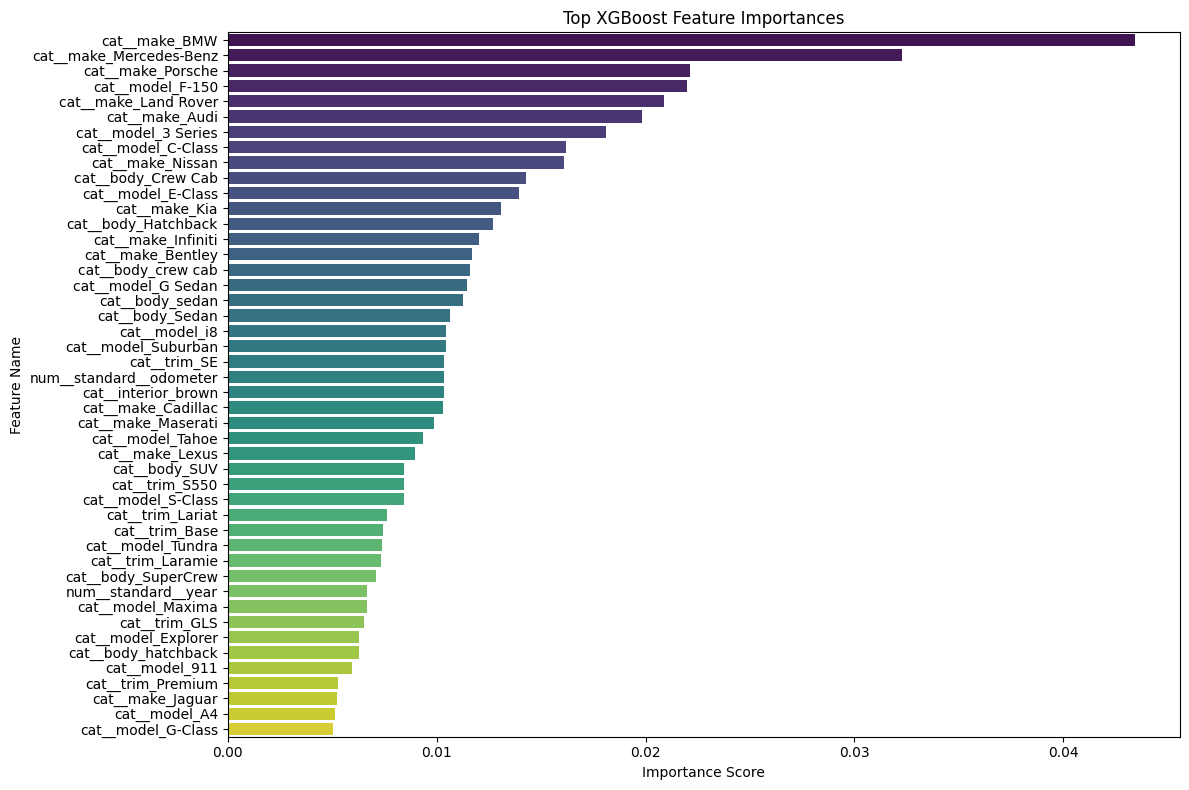

In [63]:
# Ambil nama fitur setelah preprocessing
feature_names = preprocessor.get_feature_names_out()

# Ambil feature importance dari model XGBoost
importances = pipexgb.named_steps["xgb"].feature_importances_

# Buat DataFrame agar mudah difilter dan diurutkan
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Filter hanya fitur dengan importance signifikan (> 0.005 misalnya)
top_feats = feat_imp_df[feat_imp_df['Importance'] > 0.005]

# Plot horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=top_feats, x='Importance', y='Feature', palette='viridis')
plt.title("Top XGBoost Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()


Insight:

Variabel paling berpengaruh dalam model ini adalah kolom:
1. Merk mobil, terbesar adalah BMW,
2. Model mobil, terbesar adalah 3_series,
3. Tipe mobil, terbesar adalah Crew Cab

Sisanya memiliki pengaruh yang tidak sebesar ketiga variabel tersebut, tetapi masih memiliki dampak terhadap harga pasar mobil yang diprediksi.

Selanjutnya akan masuk di sesi K-Fold Validation Score, untuk melihat apakah model yang dihasilkan memiliki performa yang stabil atau tidak. Dalam sesi ini, hasil kombinasi parameter terbaik akan diurutkan dalam 5 kombinasi dengan skor tertinggi.

___
### 8.3 K-Fold Validation Score Best Model With Parameter Tuning

In [24]:
hasil_cv = pd.DataFrame(random_search_xgb.cv_results_)
hasil_cv.sort_values('rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgb__subsample,param_xgb__reg_lambda,param_xgb__reg_alpha,param_xgb__n_estimators,param_xgb__max_depth,param_xgb__learning_rate,...,param_xgb__colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
119,2.086715,0.328393,0.064119,0.017679,1.000,0.100,0.001,250,8,0.267778,...,0.875,"{'xgb__subsample': 1.0, 'xgb__reg_lambda': 0.1...",0.865167,0.854162,0.904623,0.866501,0.883023,0.874695,0.017576,1
11,2.026680,0.120842,0.053407,0.010263,0.875,0.001,0.100,200,8,0.203333,...,1.000,"{'xgb__subsample': 0.875, 'xgb__reg_lambda': 0...",0.865669,0.852299,0.903822,0.858900,0.873983,0.870935,0.017948,2
10,1.489175,0.333964,0.054491,0.015507,0.500,0.001,0.010,200,8,0.235556,...,0.750,"{'xgb__subsample': 0.5, 'xgb__reg_lambda': 0.0...",0.874958,0.841375,0.895815,0.875249,0.857580,0.868995,0.018369,3
50,1.242586,0.183880,0.041284,0.005834,0.875,0.100,0.001,200,6,0.203333,...,1.000,"{'xgb__subsample': 0.875, 'xgb__reg_lambda': 0...",0.855674,0.848071,0.890059,0.877872,0.865830,0.867501,0.015077,4
19,1.139330,0.245221,0.047612,0.017063,1.000,0.001,0.010,150,8,0.300000,...,0.625,"{'xgb__subsample': 1.0, 'xgb__reg_lambda': 0.0...",0.860031,0.845761,0.899498,0.862965,0.859063,0.865463,0.018018,5


Insight:

Berdasarkan nilai dari mean dan standar deviasi masing-masing cv, perbedaannya tidak terlalu jauh, yang artinya model ini jika dituning akan menghasilkan banyak cv yang nilainya stabil dan tidak berbeda jauh nilai rata-rata skor atau MEAN dan standar deviasinya.

___
## 9. Model Saving

In [25]:
# Path penyimpanan
save_path = "D:\\1. Data Science\\2. Lamaran Kerja\\Technical Test\\September\\Indotruck Utama"
os.makedirs(save_path, exist_ok=True)  # Buat folder jika belum ada

# Simpan model dengan Pickle
for name, obj in {"bestmodelwithtuning.pkl": modeltuning}.items():
    pickle.dump(obj, open(os.path.join(save_path, name), "wb"))

In [30]:
import joblib
joblib.dump(model, "bestmodelwithtuning.pkl")

['bestmodelwithtuning.pkl']

___
## 10. Conclusion
### 10.1 Kesimpulan
Dari dataset yang saya olah menggunakan algoritma XGBoost Regressor, scaling data menggunakan standard scaling, mendapatkan hasil yang cukup optimal walaupun memiliki nilai R2 yang sedikit overfit, yaitu 98% nilai R2 untuk prediksi data train dan 91% nilai R2 untuk prediksi data test. Tidak menutup kemungkinan bahwa masih ada algoritma yang dapat menghasilkan nilai R2 yang lebih optimal dibandingkan yang saya gunakan saat ini, akan tetapi karena keterbatasan waktu, maka saya hanya bisa menggunakan kelima model ini dalam memprediksikan harga pasar mobil data PT. AAAA.

Walaupun tidak semua variabel fitur berpengaruh terhadap penentuan besar kecilnya harga pasar mobil, namun karena saya ingin terus belajar dalam menghargai data yang saya olah, maka saya tetap menggunakan keseluruhan data yang saya gunakan, dan tetap berhati-hati dalam proses pengolahan datanya supaya keaslian datanya tetap terjaga.

### 10.2 Saran untuk Perbaikan
Saran untuk penelitian selanjutnya adalah peneliti selanjutnya dapat melakukan hyperparameter yang lebih dalam lagi dengan menggunakan super komputer (jika dimungkinkan). Serta dapat diperhatikan dalam penggunaan algoritma SVM Regressor, karena algoritma inilah yang performanya mengikuti algoritma XGBoost Regressor. 

Peneliti selanjutnya dapat mempertimbangkan penggunaan algoritma SVM Regressor dengan hyperparameter tuning yang luas, akan tetapi diperlukan super komputer untuk mengolahnya. N. Wahyu dan Sasongko A., melakukan penelitian pencarian hyperparameter tuning dengan menggunakan Grid Search, dimana memang hyperparameter tuning yang luas dapat meningkatkan hasil prediksi dari suatu model yang digunakan, akan tetapi semakin besar jangkauan hyperparameter yang dicari, maka akan semakin berat dan semakin lama juga waktu yang akan terpakai dalam proses ini. [Link Referensi 1](https://sistemasi.ftik.unisi.ac.id/index.php/stmsi/article/view/1750/445), [Link Referensi 2](https://www.bing.com/search?q=Effect+of+Hyperparameter+Tuning+Using+Random+Search+on+Tree-Based+Classification+Algorithm+for+Software+Defect+Prediction&cvid=b5dbf275fde94e1fbf534cb1f88deab9&gs_lcrp=EgRlZGdlKgYIABBFGDkyBggAEEUYOdIBBzMyOWowajSoAgiwAgE&FORM=ANAB01&PC=LCTS)

Selain itu peneliti selanjutnya juga dapat melakukan teknik ensemble atau penggabungan algoritma XGBoost dengan SVM, yang menggunakan teknik stacking atau blending untuk meningkatkan hasil prediksi. Rofik, dkk menyimpulkan bahwa dengan melakukan teknik stacking, model dapat memiliki performa yang baik dalam klasifikasi bagus dan buruknya risiko kredit seseorang, serta pengaturan threshold juga memiliki dampak dalam prediksi data. [Link Referensi](https://shmpublisher.com/index.php/joiser/article/view/203/158)

Peneliti selanjutnya juga dapat mempertimbangkan dalam melakukan feature selection atau pemilihan beberapa fitur penting yang berdampak model, seingga hasil prediksi juga akan meningkat. Dalam penelitian yang dilakukan oleh Bezerra, F. E., dkk, pemilihan fitur memiliki dampak yang besar dalam prediksi menggunakan algoritma machine learning. [Link Referensi](https://www.mdpi.com/2076-3417/14/8/3337)

Peneliti selanjutnya juga dapat mempertimbangkan penambahan fitur-fitur atau variabel yang baru dalam data ini, sehingga semakin banyak data yang dapat digunakan untuk prediksi harga pasar mobil.
___